# Detecting Credit Card Fraud

    download data: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [29]:
df = pd.read_csv('../data/creditcardfraud.zip')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

/Users/majic/.local/share/virtualenvs/thinkful-py3-eTaMB5Ia/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/majic/.local/share/virtualenvs/thinkful-py3-eTaMB5Ia/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<function matplotlib.pyplot.show(*args, **kw)>

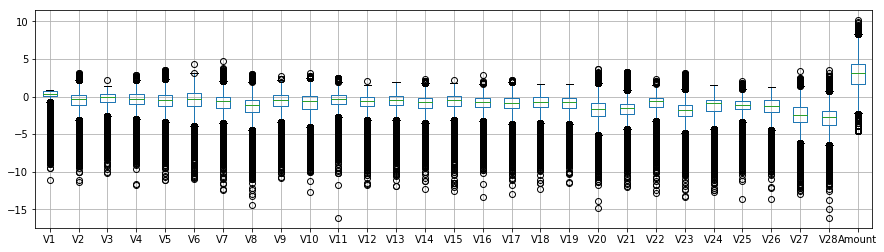

In [31]:
plt.figure(figsize=(15,4))
np.log(df.iloc[:,1:-1]).boxplot()
plt.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e497f98>,
      dtype=object)

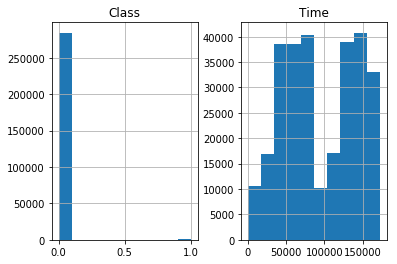

In [32]:
df[['Time', 'Class']].hist()

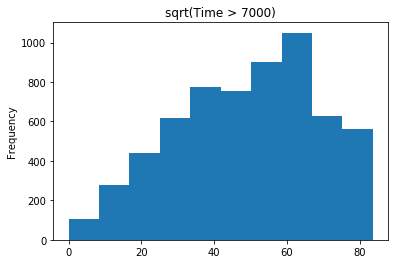

In [33]:
(df.Time[df.Time < 7000]**.5).plot.hist()
plt.title('sqrt(Time > 7000)')
plt.show()

In [34]:
df['T<7000'] = pd.get_dummies((df.Time < 7000), drop_first=True)

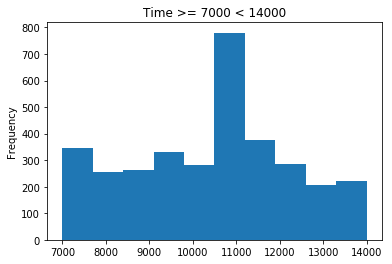

In [35]:
def myCond(x):
    if x >= 7000:
        if x < 14000:
            return x

(df.Time.apply(myCond)).plot.hist()
plt.title('Time >= 7000 < 14000')
plt.show()


In [36]:
df['7_14'] = pd.get_dummies((df['Time'] >= 7000) & (df['Time'] < 14000), drop_first=True)

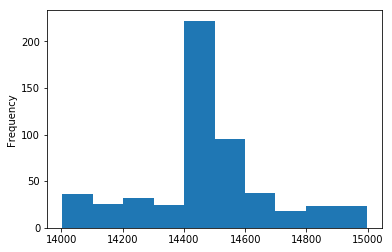

In [37]:
def myCond2(x):
    if x >= 14000:
        if x < 15000:
            return x

(df.Time.apply(myCond2)).plot.hist()
plt.show()

In [38]:
df['14_15'] = pd.get_dummies((df['Time'] >= 14000) & (df['Time'] < 15000), drop_first=True)

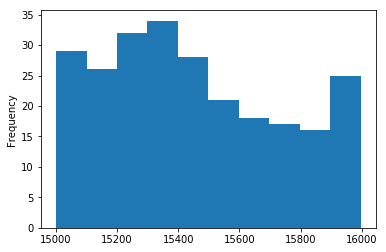

In [39]:
def myCond3(x):
    if x >= 15000:
        if x <= 16000:
            return x

(df.Time.apply(myCond3)).plot.hist()
plt.show()


In [40]:
df['15_16'] = pd.get_dummies((df['Time'] >= 15000) & (df['Time'] <= 16000), drop_first=True)

/Users/majic/.local/share/virtualenvs/thinkful-py3-eTaMB5Ia/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


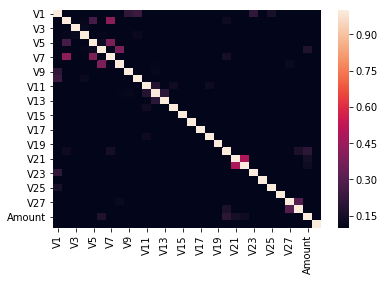

In [41]:
import seaborn as sns

data = np.log(df.iloc[:,1:-4] + 1)

cm = data.corr()

plt.figure()
sns.heatmap(cm, vmin=.1)
plt.show()

In [42]:
data = np.log(df[["V5","V6","V7","V9","V10","V12","V13",'V14',"V18","V20","V23","V25","V28",'Amount']]+1)

data = data.join(df['Class'])

/Users/majic/.local/share/virtualenvs/thinkful-py3-eTaMB5Ia/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


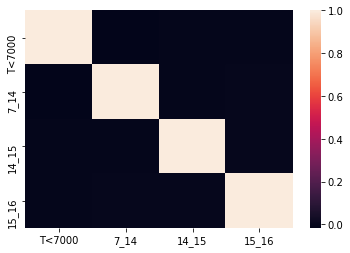

In [43]:
features = df.iloc[:, -4:]

cm = features.corr()

plt.figure()
sns.heatmap(cm)
plt.show()

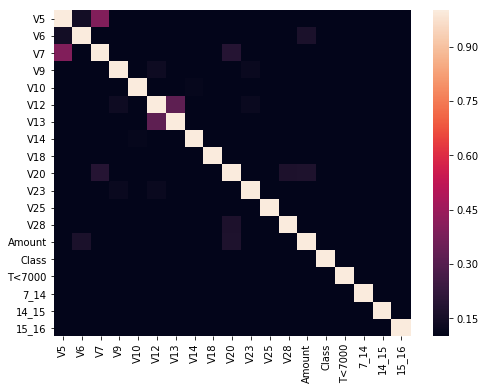

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(data.join(features).dropna().corr(), vmin=0.1)
plt.show()

# Try Gradient Boosting

In [45]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
myData = data.join(features).dropna()
y = myData['Class']
X = myData.drop('Class', 1)

# Create training and test sets.
offset = int(X.shape[0] * 0.7)

# Put 70% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 30% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [46]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# We'll make 1000 iterations, use 5-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'deviance',
          'learning_rate': 0.001,
         }

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))




Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 7.52360531166535e-05
Percent Type II errors: 3.761802655832675e-05


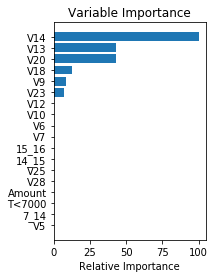

In [47]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [21]:
non_nulls = data.join(features)

In [22]:
nulls = non_nulls[non_nulls.isnull().any(axis=1)]

In [23]:
non_nulls = non_nulls.dropna()